In [192]:
import csv
import os
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

RANDOM_SEED = 42

In [193]:
# dataset = Path('gestures_dataset_new.csv')
DATASET_CSV = Path('../gestures_dataset_hallo.csv')
DATASET_ROOT = Path('../ai_data/vgt-hallo')

# UPLOADED_DATASET_CSV = Path('../uploaded_gestures_dataset.csv')
# UPLOADED_DATASET_ROOT = Path('../ai_data/vgt-uploaded')

In [194]:
def handedness_data_from_directory_names(dataset_location: Path):
    handedness_data = {}
    for gesture_folder in os.listdir(dataset_location):
        gesture_name, handedness_string = gesture_folder.split('_')
        handedness_data[gesture_name] = (handedness_string[0] == '1', handedness_string[1] == '1')
    return handedness_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Loaded 1 gestures
hallo(0 -> 0)
Dataset contain 1 gestures.


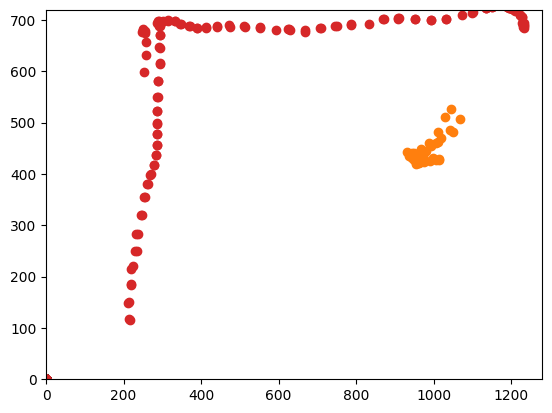

In [195]:
%load_ext autoreload
%autoreload 2
from sl_ai.gesture_classifier import GestureClassifier
from sl_ai.dataset import GestureDataset

gesture_dataset: GestureDataset = GestureDataset()
gesture_dataset.scan_videos(dataset_location=DATASET_ROOT, handedness_data=handedness_data_from_directory_names(DATASET_ROOT))
# gesture_dataset.analyze_videos(csv_out_path=DATASET_CSV, overwrite=True)

gesture_dataset.load_from_csv(DATASET_CSV, visualize_gestures_ids=[0])

# uploaded_dataset: GestureDataset = GestureDataset()
# uploaded_dataset.load_from_csv(UPLOADED_DATASET_CSV)

# gesture_dataset.append_dataset(uploaded_dataset)

gesture_dataset.summary()

classifier: GestureClassifier = GestureClassifier(gesture_dataset=gesture_dataset)

In [196]:
classifier: GestureClassifier = GestureClassifier(gesture_dataset=gesture_dataset)
print(gesture_dataset.x_data.shape)
print(gesture_dataset.y_data.shape)

(2, 400)
(2,)


In [197]:
raise Exception()

Exception: 

In [ ]:
classifier.train(train_size=.6)
classifier.summary()

In [ ]:
classifier.visualize_accuracy()

In [ ]:
classifier.visualize_loss()

In [ ]:
classifier.confusion_matrix()

# Test predictions

In [ ]:
from sl_ai.dataset import detect_hands_task, GestureData

video_path = Path('../ai_data/vgt-all/duidelijk_11/duidelijk - 2023-01-04_16-41-21.mp4')
gesture_data = GestureData(name="hello", left_hand=False, right_hand=True)
video_name, (frame_width, frame_height), left_landmarks, right_landmarks = detect_hands_task(gesture_data, video_path)


In [ ]:
from sl_ai.dataset import preprocess_landmarks
from copy import deepcopy
left_landmarks_copy = deepcopy(left_landmarks)
right_landmarks_copy = deepcopy(right_landmarks)
preprocess_landmarks(left_landmarks_copy, right_landmarks_copy, None, None)

In [ ]:
from sl_ai.dataset import pre_process_point_history_center

for i, landmarks in left_landmarks_copy.items():
    left_landmarks_copy[i] = pre_process_point_history_center(None, None, landmarks)
for i, landmarks in right_landmarks_copy.items():
    right_landmarks_copy[i] = pre_process_point_history_center(None, None, landmarks)

In [ ]:
result = classifier.predict(left_landmarks_copy, right_landmarks_copy)
classes_x = np.argmax(result, axis=1)
print(classes_x)
prediction_percents = (result*100)
frame = pd.DataFrame(prediction_percents.astype(np.int32))
print(frame)

In [ ]:
result

In [ ]:
l = np.array(left_landmarks_copy[12], dtype='float32')
r = np.array(right_landmarks_copy[12], dtype='float32')

x_data = np.concatenate((l, r), axis=0)
x_data = x_data.reshape((-1, x_data.shape[0]))
results = classifier.model.predict(x_data, batch_size=1)
classes_x = np.argmax(result, axis=1)
print(classes_x)
prediction_percents = (result*100)
frame = pd.DataFrame(prediction_percents.astype(np.int32))
print(frame)